In [59]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
pd.options.display.max_columns = 999

In [60]:
df_top_ten = pd.read_csv('top_10_zipcodes.csv')
df_top_ten = df_top_ten.drop('Unnamed: 0',axis=1)

In [61]:
df_top_ten

,zip,npv_13_17,county_name,2020_mean_fmr,2019_mean_fmr,2018_mean_fmr,2017_mean_fmr,2016_mean_fmr,2015_mean_fmr,2014_mean_fmr,2013_mean_fmr,2012_mean_fmr,2011_mean_fmr,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,10021,2149243.13,New York County NY,2089.0,1957.6,1915.6,1755.4,1693.2,1592.8,1549.0,1585.4,1521.8,1499.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13922800.0,13140500.0,12333800.0,11490700.0,10641200.0,9840100.0,9192000.0,8775700.0,8601100.0,8604300.0,8720600.0,8895900.0,9084200.0,9255300.0,9386400.0,9462700.0,9484900.0,9463700.0,9417200.0,9381500.0,9386700.0,9444700.0,9559800.0,9722800.0,9915500.0,10121500.0,10311300.0,10460600.0,10555000.0,10548400.0,10364700.0,10007400.0,9559600.0,9154200.0,8885700.0,8757500.0,8727900.0,8754300.0,8771700.0,8744900.0,8706900.0,8711800.0,8822200.0,9064200.0,9387900.0,9702500.0,9933800.0,10049200.0,10113400.0,10196100.0,10293700.0,10385600.0,10469700.0,10545700.0,10621200.0,10704000.0,10774700.0,10827900.0,10862000.0,10883800.0,10956300.0,11101000.0,11232200.0,11287000.0,11313300.0,11301600.0,11250600.0,11233000.0,11305300.0,11415000.0,11469100.0,11609900.0,11762000.0,11763400.0,11863500.0,12306900.0,12780700.0,13091400.0,13320400.0,13445900.0,13485100.0,13479900.0,13376300.0,13240500.0,13224200.0,13240700.0,13170400.0,13043800.0,12918400.0,12837300.0,12786100.0,12682500.0,12589400.0,12495300.0,12517100.0,12434700.0,12067200.0,11624000.0,11357900.0,11136900.0,11025200.0,10991600.0,10938500.0,10870900.0,10848000.0,10836800.0,10921900.0,11052900.0,11151000.0,11168300.0,11191400.0,11215900.0,11294800.0,11414600.0,11484300.0,116

In [62]:
def smoosh_to_ts(df,zipcode):
    
    df_w1 = df.loc[(df['zip']==zipcode)]
    df_w2 = df_w1.loc[:, '2005-01':'2018-04']
    df_w3 = df_w2.transpose()
    df_w3.reset_index(inplace=True)
    df_w3['time'] = pd.to_datetime(df_w3['index'], infer_datetime_format=True)
    df_w4 = df_w3.drop('index',axis=1)
    df_w5 = df_w4.set_index('time')
    df_w6 = df_w5.rename(columns={df.loc[(df['zip']==zipcode)].index[0]:'price'})
    
    df_w7 = pd.DataFrame()
    df_w7[['2018','2017','2016','2015','2014','2013','2012','2011']] = df_w1.loc[:, '2018_mean_fmr':'2011_mean_fmr']
    df_w8 = df_w7.transpose()
    df_w8.reset_index(inplace=True)
    df_w8['time'] = pd.to_datetime(df_w8['index'], infer_datetime_format=True)
    df_w9 = df_w8.drop('index',axis=1)
    df_w10 = df_w9.set_index('time')
    df_w11 = df_w10.rename(columns={df.loc[(df['zip']==zipcode)].index[0]:'fmr'})    
    
    return df_w6, df_w11

In [63]:
top_list = list(df_top_ten['zip'])
ts1_cap_ns, ts1_fmr_ns = smoosh_to_ts(df_top_ten,top_list[0])
ts2_cap_ns, ts2_fmr_ns = smoosh_to_ts(df_top_ten,top_list[1])
ts3_cap_ns, ts3_fmr_ns = smoosh_to_ts(df_top_ten,top_list[2])
ts4_cap_ns, ts4_fmr_ns = smoosh_to_ts(df_top_ten,top_list[3])
ts5_cap_ns, ts5_fmr_ns = smoosh_to_ts(df_top_ten,top_list[4])
ts6_cap_ns, ts6_fmr_ns = smoosh_to_ts(df_top_ten,top_list[5])
ts7_cap_ns, ts7_fmr_ns = smoosh_to_ts(df_top_ten,top_list[6])
ts8_cap_ns, ts8_fmr_ns = smoosh_to_ts(df_top_ten,top_list[7])
ts9_cap_ns, ts9_fmr_ns = smoosh_to_ts(df_top_ten,top_list[8])
ts10_cap_ns, ts10_fmr_ns = smoosh_to_ts(df_top_ten,top_list[9])

In [64]:
def stationarity_check(TS,name=None):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['price'])
    
    # Print Dickey-Fuller test results
    if name:
        print(f'Results of Dickey-Fuller Test for {name}: \n')
    
    else:
        print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return print(dfoutput)


In [65]:
stationarity_check(ts1_cap_ns)

Results of Dickey-Fuller Test: 

Test Statistic                  -1.359443
p-value                          0.601558
#Lags Used                      13.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64


In [66]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_log_ts(ts):

    decomposition = seasonal_decompose(np.log(ts))

    # Gather the trend, seasonality, and residuals 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Drop missing values from residuals 
    ts_dec = pd.DataFrame(residual)
    ts_dec.dropna(inplace=True)
    ts_dec.rename(columns={"resid": "price"}, inplace=True)
    
    return ts_dec

# Check stationarity
# stationarity_check(ts1_cap)

In [67]:
ts1_cap = decompose_log_ts(ts1_cap_ns)
ts2_cap = decompose_log_ts(ts2_cap_ns)
ts3_cap = decompose_log_ts(ts3_cap_ns)
ts4_cap = decompose_log_ts(ts4_cap_ns)
ts5_cap = decompose_log_ts(ts5_cap_ns)
ts6_cap = decompose_log_ts(ts6_cap_ns)
ts7_cap = decompose_log_ts(ts7_cap_ns)
ts8_cap = decompose_log_ts(ts8_cap_ns)
ts9_cap = decompose_log_ts(ts9_cap_ns)
ts10_cap = decompose_log_ts(ts10_cap_ns)

In [68]:
ts_list = [[ts1_cap,'ts1_cap'],
            [ts2_cap,'ts2_cap'],
            [ts3_cap,'ts3_cap'],
            [ts4_cap,'ts4_cap'],
            [ts5_cap,'ts5_cap'],
            [ts6_cap,'ts6_cap'],
            [ts7_cap,'ts7_cap'],
            [ts8_cap,'ts8_cap'],
            [ts9_cap,'ts9_cap'],
            [ts10_cap,'ts10_cap']]

In [69]:
print(stationarity_check(ts1_cap,name='ts1_cap'))
print(stationarity_check(ts2_cap,name='ts2_cap'))
print(stationarity_check(ts3_cap,name='ts3_cap'))
print(stationarity_check(ts4_cap,name='ts4_cap'))
print(stationarity_check(ts5_cap,name='ts5_cap'))
print(stationarity_check(ts6_cap,name='ts6_cap'))
print(stationarity_check(ts7_cap,name='ts7_cap'))
print(stationarity_check(ts8_cap,name='ts8_cap'))
print(stationarity_check(ts9_cap,name='ts9_cap'))
print(stationarity_check(ts10_cap,name='ts10_cap'))

Results of Dickey-Fuller Test for ts1_cap: 

Test Statistic                  -3.853866
p-value                          0.002402
#Lags Used                      13.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64
None
Results of Dickey-Fuller Test for ts2_cap: 

Test Statistic                  -4.374547
p-value                          0.000329
#Lags Used                      10.000000
Number of Observations Used    137.000000
Critical Value (1%)             -3.479007
Critical Value (5%)             -2.882878
Critical Value (10%)            -2.578149
dtype: float64
None
Results of Dickey-Fuller Test for ts3_cap: 

Test Statistic                  -2.693314
p-value                          0.075202
#Lags Used                       7.000000
Number of Observations Used    140.000000
Critical Value (1%)             -3.477945
Critical Value (5%)        

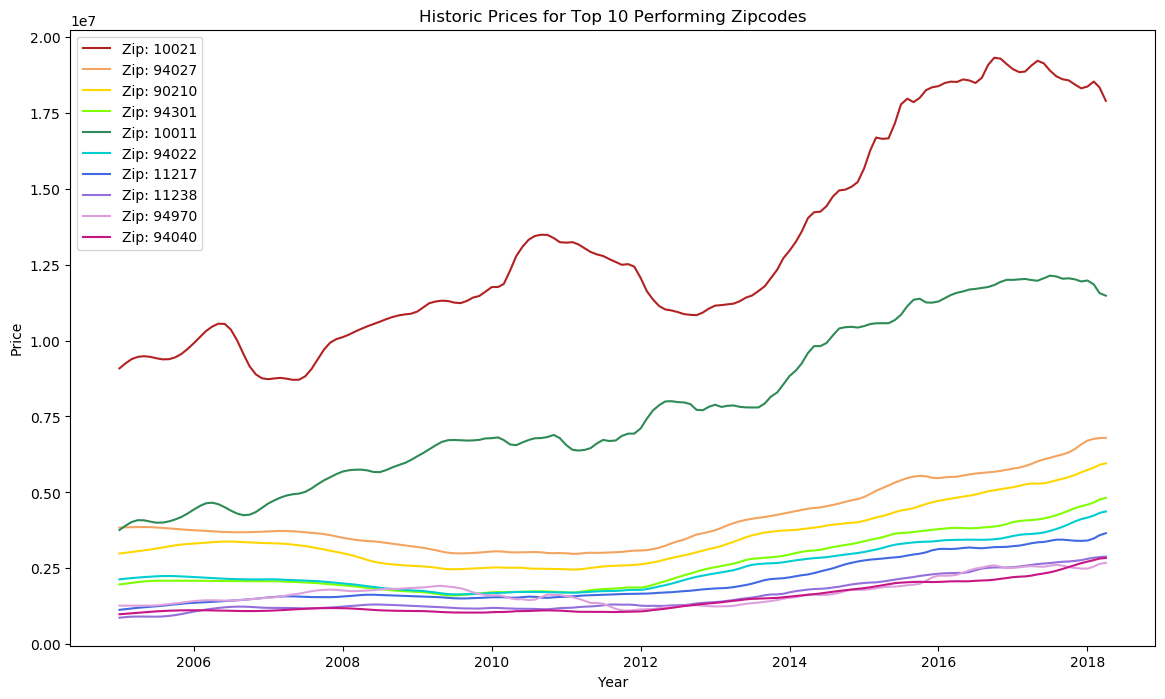

In [70]:
plt.figure(figsize=(14,8))
plt.plot(ts1_cap_ns, label=f'Zip: {top_list[0]}', color='firebrick')
plt.plot(ts2_cap_ns, label=f'Zip: {top_list[1]}', color='sandybrown')
plt.plot(ts3_cap_ns, label=f'Zip: {top_list[2]}', color='gold')
plt.plot(ts4_cap_ns, label=f'Zip: {top_list[3]}', color='chartreuse')
plt.plot(ts5_cap_ns, label=f'Zip: {top_list[4]}', color='seagreen')
plt.plot(ts6_cap_ns, label=f'Zip: {top_list[5]}', color='darkturquoise')
plt.plot(ts7_cap_ns, label=f'Zip: {top_list[6]}', color='royalblue')
plt.plot(ts8_cap_ns, label=f'Zip: {top_list[7]}', color='mediumpurple')
plt.plot(ts9_cap_ns, label=f'Zip: {top_list[8]}', color='plum')
plt.plot(ts10_cap_ns, label=f'Zip: {top_list[9]}', color='mediumvioletred')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Historic Prices for Top 10 Performing Zipcodes')
plt.legend(loc='best')
plt.show()

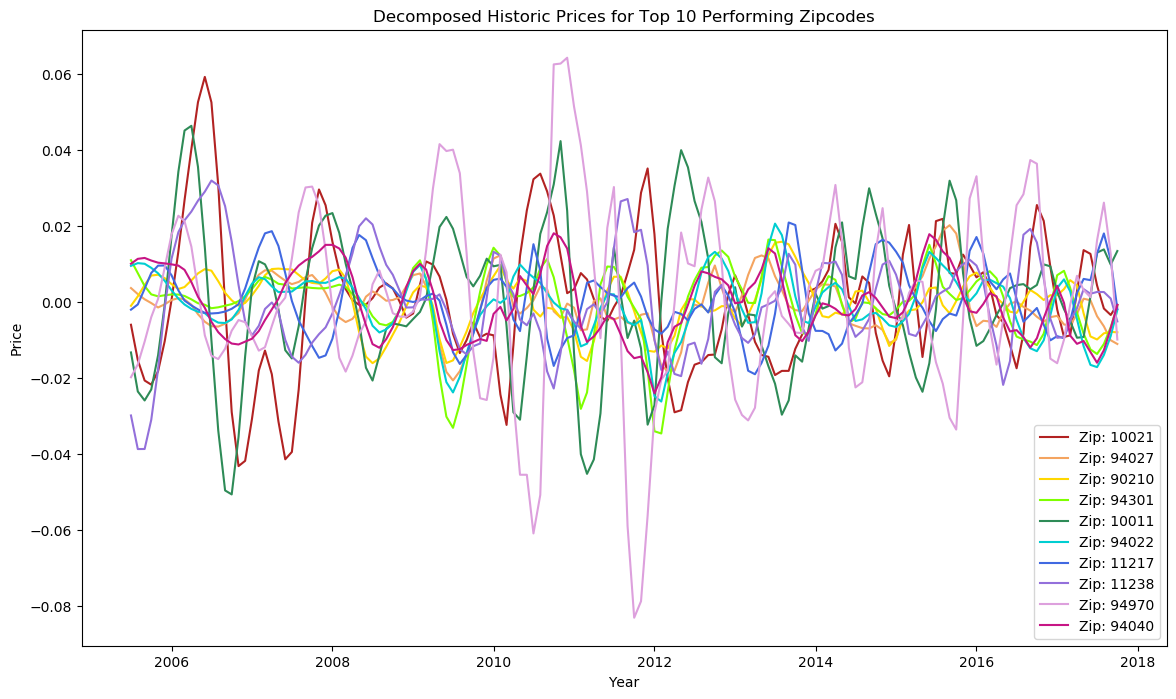

In [71]:
plt.figure(figsize=(14,8))
plt.plot(ts1_cap, label=f'Zip: {top_list[0]}', color='firebrick')
plt.plot(ts2_cap, label=f'Zip: {top_list[1]}', color='sandybrown')
plt.plot(ts3_cap, label=f'Zip: {top_list[2]}', color='gold')
plt.plot(ts4_cap, label=f'Zip: {top_list[3]}', color='chartreuse')
plt.plot(ts5_cap, label=f'Zip: {top_list[4]}', color='seagreen')
plt.plot(ts6_cap, label=f'Zip: {top_list[5]}', color='darkturquoise')
plt.plot(ts7_cap, label=f'Zip: {top_list[6]}', color='royalblue')
plt.plot(ts8_cap, label=f'Zip: {top_list[7]}', color='mediumpurple')
plt.plot(ts9_cap, label=f'Zip: {top_list[8]}', color='plum')
plt.plot(ts10_cap, label=f'Zip: {top_list[9]}', color='mediumvioletred')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Decomposed Historic Prices for Top 10 Performing Zipcodes')
plt.legend(loc='best')
plt.show()

In [72]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

for ts in ts_list:
    

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts[0],
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

            except:
                continue

    print(f'{ts[1]}: '+'ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic.min()))

ts1_cap: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-841.3576645470179
ts2_cap: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-1030.4964445661099
ts3_cap: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-1077.9706836930384
ts4_cap: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-986.087343569738
ts5_cap: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-794.0504368567655
ts6_cap: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-1060.8953460513023
ts7_cap: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-977.0980231091969
ts8_cap: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-910.389760156959
ts9_cap: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-708.1523369659078
ts10_cap: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-1026.733405049265


In [73]:
mod_ts1 = sm.tsa.statespace.SARIMAX(ts1_cap,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
mod_ts2 = sm.tsa.statespace.SARIMAX(ts2_cap,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
mod_ts3 = sm.tsa.statespace.SARIMAX(ts3_cap,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
mod_ts4 = sm.tsa.statespace.SARIMAX(ts4_cap,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
mod_ts5 = sm.tsa.statespace.SARIMAX(ts5_cap,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
mod_ts6 = sm.tsa.statespace.SARIMAX(ts6_cap,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
mod_ts7 = sm.tsa.statespace.SARIMAX(ts7_cap,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
mod_ts8 = sm.tsa.statespace.SARIMAX(ts8_cap,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
mod_ts9 = sm.tsa.statespace.SARIMAX(ts9_cap,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
mod_ts10 = sm.tsa.statespace.SARIMAX(ts10_cap,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

results_ts1 = mod_ts1.fit()
results_ts2 = mod_ts2.fit()
results_ts3 = mod_ts3.fit()
results_ts4 = mod_ts4.fit()
results_ts5 = mod_ts5.fit()
results_ts6 = mod_ts6.fit()
results_ts7 = mod_ts7.fit()
results_ts8 = mod_ts8.fit()
results_ts9 = mod_ts9.fit()
results_ts10 = mod_ts10.fit()


In [74]:
pred_ts1 = results_ts1.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)

pred_ts2 = results_ts2.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)

pred_ts3 = results_ts3.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)

pred_ts4 = results_ts4.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)

pred_ts5 = results_ts5.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)

pred_ts6 = results_ts6.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)

pred_ts7 = results_ts7.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)

pred_ts8 = results_ts8.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)

pred_ts9 = results_ts9.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)

pred_ts10 = results_ts10.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)

In [87]:
def show_mse_results(ts,pred_ts,name):

    y_forecasted = pred_ts.predicted_mean
    y_truth = ts['price']['2016-01-01':]

    # Compute the mean square error
    mse = ((y_forecasted - y_truth) ** 2).mean()
    return print(f'The Mean Squared Error of our forecasts for {name} '+'is {}'.format(round(mse, 2)))

In [90]:
show_mse_results(ts1_cap,pred_ts1,'ts1_cap')
show_mse_results(ts2_cap,pred_ts2,'ts2_cap')
show_mse_results(ts3_cap,pred_ts3,'ts3_cap')
show_mse_results(ts4_cap,pred_ts4,'ts4_cap')
show_mse_results(ts5_cap,pred_ts5,'ts5_cap')
show_mse_results(ts6_cap,pred_ts6,'ts6_cap')
show_mse_results(ts7_cap,pred_ts7,'ts7_cap')
show_mse_results(ts8_cap,pred_ts8,'ts8_cap')
show_mse_results(ts9_cap,pred_ts9,'ts9_cap')
show_mse_results(ts10_cap,pred_ts10,'ts10_cap')

The Mean Squared Error of our forecasts for ts1_cap is 0.0
The Mean Squared Error of our forecasts for ts2_cap is 0.0
The Mean Squared Error of our forecasts for ts3_cap is 0.0
The Mean Squared Error of our forecasts for ts4_cap is 0.0
The Mean Squared Error of our forecasts for ts5_cap is 0.0
The Mean Squared Error of our forecasts for ts6_cap is 0.0
The Mean Squared Error of our forecasts for ts7_cap is 0.0
The Mean Squared Error of our forecasts for ts8_cap is 0.0
The Mean Squared Error of our forecasts for ts9_cap is 0.0
The Mean Squared Error of our forecasts for ts10_cap is 0.0


In [78]:
# Get forecast 500 steps ahead in future and confidence intervals of forecasts
pred_uc_ts1 = results_ts1.get_forecast(steps=20)
pred_ci_ts1 = pred_uc_ts1.conf_int()

pred_uc_ts2 = results_ts2.get_forecast(steps=20)
pred_ci_ts2 = pred_uc_ts2.conf_int()

pred_uc_ts3 = results_ts3.get_forecast(steps=20)
pred_ci_ts3 = pred_uc_ts3.conf_int()

pred_uc_ts4 = results_ts4.get_forecast(steps=20)
pred_ci_ts4 = pred_uc_ts4.conf_int()

pred_uc_ts5 = results_ts5.get_forecast(steps=20)
pred_ci_ts5 = pred_uc_ts5.conf_int()

pred_uc_ts6 = results_ts6.get_forecast(steps=20)
pred_ci_ts6 = pred_uc_ts6.conf_int()

pred_uc_ts7 = results_ts7.get_forecast(steps=20)
pred_ci_ts7 = pred_uc_ts7.conf_int()

pred_uc_ts8 = results_ts8.get_forecast(steps=20)
pred_ci_ts8 = pred_uc_ts8.conf_int()

pred_uc_ts9 = results_ts9.get_forecast(steps=20)
pred_ci_ts9 = pred_uc_ts9.conf_int()

pred_uc_ts10 = results_ts10.get_forecast(steps=20)
pred_ci_ts10 = pred_uc_ts10.conf_int()

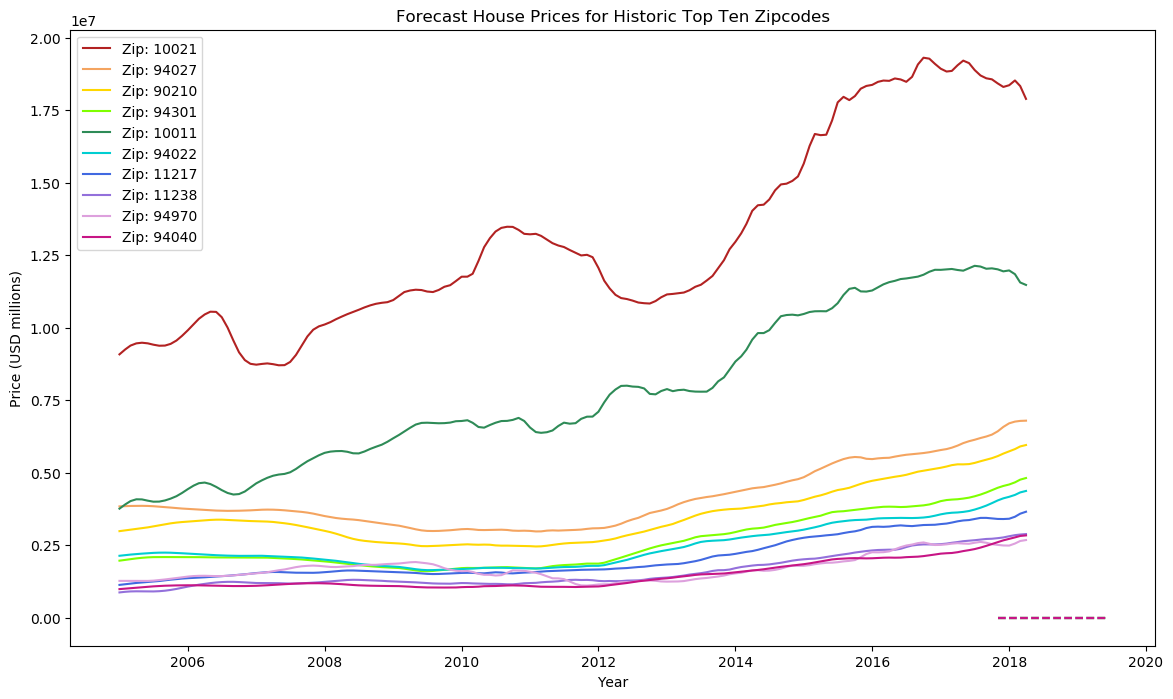

In [81]:
plt.figure(figsize=(14,8))
plt.plot(ts1_cap_ns, label=f'Zip: {top_list[0]}', color='firebrick')
plt.plot(pred_uc_ts1.predicted_mean, color='firebrick', linestyle='--')
plt.plot(ts2_cap_ns, label=f'Zip: {top_list[1]}', color='sandybrown')
plt.plot(pred_uc_ts2.predicted_mean, color='sandybrown', linestyle='--')
plt.plot(ts3_cap_ns, label=f'Zip: {top_list[2]}', color='gold')
plt.plot(pred_uc_ts3.predicted_mean, color='gold', linestyle='--')
plt.plot(ts4_cap_ns, label=f'Zip: {top_list[3]}', color='chartreuse')
plt.plot(pred_uc_ts4.predicted_mean, color='chartreuse', linestyle='--')
plt.plot(ts5_cap_ns, label=f'Zip: {top_list[4]}', color='seagreen')
plt.plot(pred_uc_ts5.predicted_mean, color='seagreen', linestyle='--')
plt.plot(ts6_cap_ns, label=f'Zip: {top_list[5]}', color='darkturquoise')
plt.plot(pred_uc_ts6.predicted_mean, color='darkturquoise', linestyle='--')
plt.plot(ts7_cap_ns, label=f'Zip: {top_list[6]}', color='royalblue')
plt.plot(pred_uc_ts7.predicted_mean, color='royalblue', linestyle='--')
plt.plot(ts8_cap_ns, label=f'Zip: {top_list[7]}', color='mediumpurple')
plt.plot(pred_uc_ts8.predicted_mean, color='mediumpurple', linestyle='--')
plt.plot(ts9_cap_ns, label=f'Zip: {top_list[8]}', color='plum')
plt.plot(pred_uc_ts9.predicted_mean, color='plum', linestyle='--')
plt.plot(ts10_cap_ns, label=f'Zip: {top_list[9]}', color='mediumvioletred')
plt.plot(pred_uc_ts10.predicted_mean, color='mediumvioletred', linestyle='--')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Price (USD millions)')
plt.title('Forecast House Prices for Historic Top Ten Zipcodes')
plt.show()

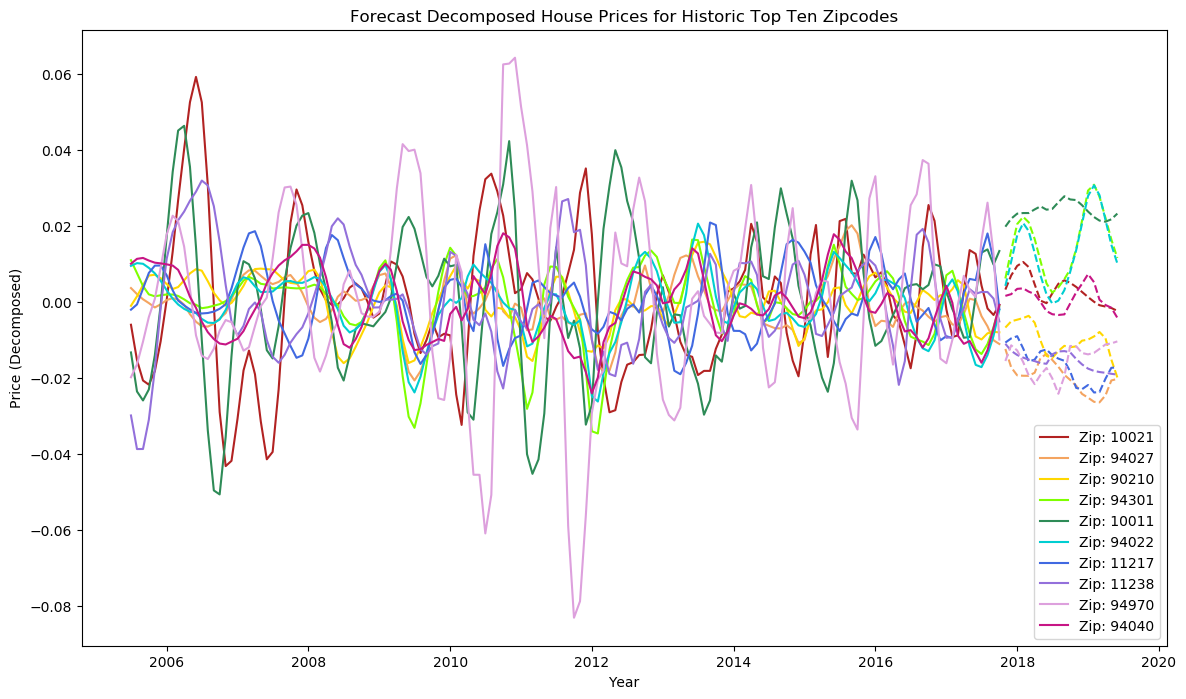

In [82]:
plt.figure(figsize=(14,8))
plt.plot(ts1_cap, label=f'Zip: {top_list[0]}', color='firebrick')
plt.plot(pred_uc_ts1.predicted_mean, color='firebrick', linestyle='--')
plt.plot(ts2_cap, label=f'Zip: {top_list[1]}', color='sandybrown')
plt.plot(pred_uc_ts2.predicted_mean, color='sandybrown', linestyle='--')
plt.plot(ts3_cap, label=f'Zip: {top_list[2]}', color='gold')
plt.plot(pred_uc_ts3.predicted_mean, color='gold', linestyle='--')
plt.plot(ts4_cap, label=f'Zip: {top_list[3]}', color='chartreuse')
plt.plot(pred_uc_ts4.predicted_mean, color='chartreuse', linestyle='--')
plt.plot(ts5_cap, label=f'Zip: {top_list[4]}', color='seagreen')
plt.plot(pred_uc_ts5.predicted_mean, color='seagreen', linestyle='--')
plt.plot(ts6_cap, label=f'Zip: {top_list[5]}', color='darkturquoise')
plt.plot(pred_uc_ts6.predicted_mean, color='darkturquoise', linestyle='--')
plt.plot(ts7_cap, label=f'Zip: {top_list[6]}', color='royalblue')
plt.plot(pred_uc_ts7.predicted_mean, color='royalblue', linestyle='--')
plt.plot(ts8_cap, label=f'Zip: {top_list[7]}', color='mediumpurple')
plt.plot(pred_uc_ts8.predicted_mean, color='mediumpurple', linestyle='--')
plt.plot(ts9_cap, label=f'Zip: {top_list[8]}', color='plum')
plt.plot(pred_uc_ts9.predicted_mean, color='plum', linestyle='--')
plt.plot(ts10_cap, label=f'Zip: {top_list[9]}', color='mediumvioletred')
plt.plot(pred_uc_ts10.predicted_mean, color='mediumvioletred', linestyle='--')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Price (Decomposed)')
plt.title('Forecast Decomposed House Prices for Historic Top Ten Zipcodes')
plt.show()